In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [2]:
#start = '2000-07-01'
#end = '2023-03-10'

import pandas as pd

TAB1  = pd.read_excel('peso dollar rate.xlsx')
# Convert daily data to weekly data, taking the last observation of each week
TAB2 = TAB1.set_index('Date').resample('W').last().reset_index()
TAB3 = pd.read_excel('EMEAP_Daily FX.xlsx')
TAB4 = TAB3.set_index('Date').resample('W').last().reset_index()
Names = TAB4.columns.tolist()
Names1 = Names[1:]
print(Names1)
print(TAB4)
date1= TAB4['Date']
date2=date1.iloc[1:]
ExRate= TAB4.loc[:, 'Date':].iloc[:, 1:]
rr,cc = ExRate.shape




FileNotFoundError: ignored

In [ ]:
ExRate = np.array(ExRate)
import pandas as pd
import numpy as np






1193 11


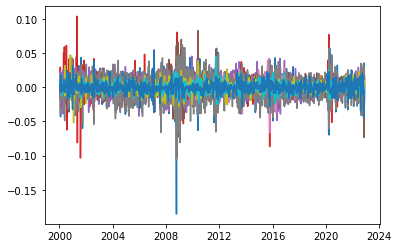

In [ ]:
import numpy as np
ExRatediff = np.diff(np.log(ExRate).T).T
plt.plot(date2, ExRatediff)
rr, cc = ExRatediff.shape
print(rr,cc)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  5.,  1.,  2.,
         2.,  2.,  1.,  0.,  3.,  4.,  4.,  3.,  6., 17., 11.,  5., 15.,
        13., 11., 21., 10., 16., 33., 28., 29., 30., 37., 25., 44., 46.,
        40., 47., 54., 47., 37., 37., 36., 48., 32., 39., 32., 26., 30.,
        35., 18., 24., 22.,  7., 16., 16., 15., 10., 12.,  8.,  9., 10.,
         4.,  6.,  5.,  8.,  4.,  2.,  0.,  3.,  2.,  0.,  1.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.

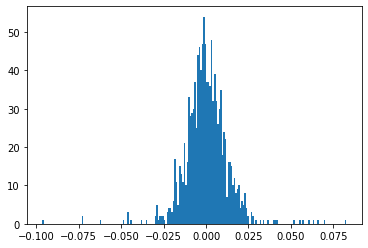

In [ ]:
plt.hist(ExRatediff[:,5], 200)


In [ ]:
import pandas as pd
ExRatediff = pd.DataFrame(ExRatediff)


ExRatediff.replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN
ExRatediff.dropna

<bound method DataFrame.dropna of             0         1         2         3         4         5         6   \
0     0.016357  0.000036  0.000141 -0.005879  0.005019 -0.017551  0.000000   
1    -0.004215 -0.000024  0.000051  0.029328 -0.010349  0.008721  0.000132   
2    -0.042999 -0.000169  0.000154  0.018907  0.022180 -0.003171 -0.000132   
3     0.004713  0.000085  0.000039  0.011704  0.000560  0.004944  0.000000   
4    -0.011825  0.000000  0.000141 -0.030611  0.015092 -0.007170  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1188  0.028623  0.005283 -0.000064  0.013524 -0.006884  0.007807  0.007180   
1189  0.005004  0.003010 -0.000115 -0.005195 -0.000339 -0.012964 -0.002895   
1190  0.009161 -0.009323  0.000140  0.011889 -0.006662 -0.001795  0.004856   
1191  0.035379 -0.012295 -0.001696 -0.015625 -0.054738 -0.073303 -0.026896   
1192  0.002384  0.002575 -0.001763  0.012443  0.007321  0.016097 -0.014339   

            7         8      

In [ ]:
print(np.isnan(ExRatediff).any())
print(np.isinf(ExRatediff).any())
ExRatediff = ExRatediff[~np.isnan(ExRatediff)]
ExRatediff = ExRatediff[~np.isinf(ExRatediff)]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool


In [ ]:
import numpy as np
from scipy import stats

# assuming ExRatediff is a numpy array with shape (n, cc)
n, cc = ExRatediff.shape
ExRatediff = np.array(ExRatediff)
kde_values = np.zeros((n, cc))
Xe = np.zeros((100, cc))
Fe = np.zeros((100, cc))

for i in range(cc):
    kde = stats.gaussian_kde(ExRatediff[:, i])
    kde_values[:, i] = kde.evaluate(ExRatediff[:, i])
    Xe[:, i] = np.linspace(np.min(ExRatediff[:, i]), np.max(ExRatediff[:, i]), 100)
    Fe[:, i] = kde.evaluate(Xe[:, i])


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003024. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     10,   Func. Count:    139,   Neg. LLF: 466157127496361.9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3266.1675928812574
            Iterations: 15
            Function evaluations: 187
            Gradient evaluations: 13


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001728. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001805. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Optimization terminated successfully    (Exit mode 0)
            Current function value: -3754.0693818621585
            Iterations: 9
            Function evaluations: 70
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3489.8684229050077
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001665. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.06e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:753: ConvergenceWarnin

Iteration:     10,   Func. Count:    142,   Neg. LLF: -3685.9254993926115
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3685.925499428682
            Iterations: 14
            Function evaluations: 142
            Gradient evaluations: 10
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -4554.350305598942
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003146. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.013e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     10,   Func. Count:    126,   Neg. LLF: -3179.9187962434976
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3179.918796411812
            Iterations: 14
            Function evaluations: 126
            Gradient evaluations: 10
Iteration:     10,   Func. Count:    148,   Neg. LLF: -4185.882329272594
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4185.88233011856
            Iterations: 14
            Function evaluations: 148
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4294.869730186758
            Iterations: 6
            Function evaluations: 22
            Gradient evaluations: 2
Iteration:     10,   Func. Count:    151,   Neg. LLF: 2.53418451168605e+21
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4154.694110778531
            Iterations: 16
            F

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.864e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.279e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


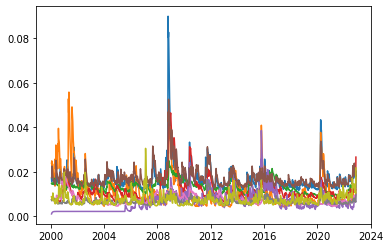

In [ ]:
from pandas.core.generic import validate_fillna_kwargs
# !pip install arch
ExRatediff1  = np.delete(ExRatediff, [1, 2], axis=1)
Names2 = np.delete(Names1,[1,2], axis = 0)
from arch import arch_model
rr, cc = ExRatediff1.shape 
v = np.zeros((rr,cc))
PARAMS = np.zeros((6,cc))
mean_model = 'ARX'
vol_model = 'GARCH'

for i in range (0,cc):
  r = ExRatediff1[:,i] 
  model = arch_model(r, mean=mean_model, lags=1, vol=vol_model, o=1,p=1, q=1)
  res = model.fit(update_freq=10)
  cond_vol = res.conditional_volatility
  v[:,i] = cond_vol
  PARAMS[:,i] = res.params


v = v[1:,:]
date3 = date2[1:]
plt.plot(date3,v)





# Print the conditional volatility


In [ ]:
PARAMS = pd.DataFrame(PARAMS)
PARAMS = pd.DataFrame(PARAMS)
NamesList = Names3.reset_index(drop=True).T 
COEFFICIENT = pd.concat([NamesList, PARAMS], axis=0, ignore_index=True).reset_index(drop=True)
print(COEFFICIENT)


           0          1         2         3         4           5  \
0  Australia  Indonesia     Japan     Korea  Malaysia  NewZealand   
1  -0.000343   0.000312  0.000297 -0.000232  0.000145   -0.000039   
2  -0.034542   0.130999 -0.045527  0.061759  0.047043   -0.017309   
3    0.00003   0.000003  0.000004  0.000003  0.000001    0.000032   
4   0.099997        0.2  0.050112  0.100003       0.2    0.099994   
5   0.099996       0.01   0.00988  0.009996      0.05    0.049997   
6   0.749978      0.775  0.924891  0.874998     0.755    0.774953   

             6          7         8  
0  Phillipines  Singapore  Thailand  
1     0.000098  -0.000252 -0.000459  
2     0.023634    0.03261   0.03986  
3     0.000001   0.000005  0.000006  
4     0.050014        0.1       0.2  
5     0.009985       0.01      0.01  
6     0.924986      0.795     0.695  


In [ ]:
Mu = np.mean(v,0)
Sigma= np.std(v,0)
Max = np.max(v,0)
Min = np.min(v,0)
Stats = np.vstack((Mu,Sigma,Max,Min))
Stats1 = pd.DataFrame(Stats)
NamesList = Names3.reset_index(drop=True).T 
TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)
#TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)

TableStats1 = TableStats.reset_index(drop=True)
print(TableStats1)






           0          1         2         3         4           5  \
0  Australia  Indonesia     Japan     Korea  Malaysia  NewZealand   
1   0.016549   0.010996   0.01319  0.011561  0.006453    0.017326   
2   0.006049     0.0073  0.002696  0.005349   0.00427    0.004296   
3   0.089897   0.055823  0.024989   0.04647  0.038588    0.052603   
4   0.011453   0.004224  0.008339  0.006211  0.001114    0.012723   

             6          7         8  
0  Phillipines  Singapore  Thailand  
1     0.007456   0.006808  0.007494  
2     0.002036   0.001446  0.002437  
3     0.017875   0.016317  0.030562  
4     0.004556   0.005028  0.004646  


In [ ]:
Mu = np.mean(v,0)
Sigma= np.std(v,0)
Max = np.max(v,0)
Min = np.min(v,0)
Stats = np.vstack((Mu,Sigma,Max,Min))
Stats1 = pd.DataFrame(Stats)
NamesList = Names3.reset_index(drop=True).T 
TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)
#TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)

TableStats1 = TableStats.reset_index(drop=True)
print(TableStats1)






           0          1         2         3         4           5  \
0  Australia  Indonesia     Japan     Korea  Malaysia  NewZealand   
1   0.016549   0.010996   0.01319  0.011561  0.006453    0.017326   
2   0.006049     0.0073  0.002696  0.005349   0.00427    0.004296   
3   0.089897   0.055823  0.024989   0.04647  0.038588    0.052603   
4   0.011453   0.004224  0.008339  0.006211  0.001114    0.012723   

             6          7         8  
0  Phillipines  Singapore  Thailand  
1     0.007456   0.006808  0.007494  
2     0.002036   0.001446  0.002437  
3     0.017875   0.016317  0.030562  
4     0.004556   0.005028  0.004646  


In [ ]:
Mu = np.mean(v,0)
Sigma= np.std(v,0)
Max = np.max(v,0)
Min = np.min(v,0)
Stats = np.vstack((Mu,Sigma,Max,Min))
Stats1 = pd.DataFrame(Stats)
NamesList = Names3.reset_index(drop=True).T 
TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)
#TableStats = pd.concat([NamesList, Stats1], axis=0, ignore_index=True).reset_index(drop=True)

TableStats1 = TableStats.reset_index(drop=True)
print(TableStats1)






           0          1         2         3         4           5  \
0  Australia  Indonesia     Japan     Korea  Malaysia  NewZealand   
1   0.016549   0.010996   0.01319  0.011561  0.006453    0.017326   
2   0.006049     0.0073  0.002696  0.005349   0.00427    0.004296   
3   0.089897   0.055823  0.024989   0.04647  0.038588    0.052603   
4   0.011453   0.004224  0.008339  0.006211  0.001114    0.012723   

             6          7         8  
0  Phillipines  Singapore  Thailand  
1     0.007456   0.006808  0.007494  
2     0.002036   0.001446  0.002437  
3     0.017875   0.016317  0.030562  
4     0.004556   0.005028  0.004646  


In [ ]:
#import arch
Mdl1=arch.arch_model(1000*r,vol='GARCH', p=1,q=1).fit()
v=Mdl1.forecast(start = 0, method='simulation').variance/1e6
Mdl1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8846.24713305387
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4756.587376869924
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5079.849839077448
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4821.328972042362
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4747.440867908401
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4747.2550672860825
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4747.254359762258
Iteration:      8,   Func. Count:     49,   Neg. LLF: 4747.254356412866
Iteration:      9,   Func. Count:     53,   Neg. LLF: 4747.254356412249
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4747.254356412866
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4747.25
Distribution:                  Normal   AIC:                           9502.51
Method:            Maximum Likelihood   BIC:                           9522.85
                                        No. Observations:                 1193
Date:                Thu, Mar 16 2023   Df Residuals:                     1192
Time:                        07:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3280      0.362      0.906      0.365 [ -0.381,  1.037]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          5.6056      3.341      1.678  9.341e-02   [ -0.943, 12.154]
alpha[1]       0.0835  2.840e-02      2.941  3.275e-03 [2.786e-02,  0.139]
beta[1]        0.8881  4.054e-02     21.910 2.076e-106   [  0.809,  0.968]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
Mdl2=arch.arch_model(100*r,vol='EGARCH', p=1,o=1,q=1, lags=1, rescale=False).fit()
v2=Mdl2.forecast(start = 0, method='simulation').variance/1e6
Mdl2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1465315215.5128775
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3598500.324797894
Iteration:      3,   Func. Count:     32,   Neg. LLF: 12477.668992283045
Iteration:      4,   Func. Count:     44,   Neg. LLF: 6720252297.193189
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4622275.815824016
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1911078768.4212053
Iteration:      7,   Func. Count:     66,   Neg. LLF: 1695214738.2191348
Iteration:      8,   Func. Count:     73,   Neg. LLF: 1664441070.5640647
Iteration:      9,   Func. Count:     80,   Neg. LLF: 12632.140072019858
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2183416.816964255
Iteration:     11,   Func. Count:     96,   Neg. LLF: 6690.231202573156
Iteration:     12,   Func. Count:    103,   Neg. LLF: 1648029305.2207022
Iteration:     13,   Func. Count:    110,   Neg. LLF: 293293813475.8072
Iteration:     14,   Func. Count:    120,   Neg. LLF: 561

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -5670.76
Distribution:                  Normal   AIC:                           11351.5
Method:            Maximum Likelihood   BIC:                           11376.9
                                        No. Observations:                 1193
Date:                Thu, Mar 16 2023   Df Residuals:                     1192
Time:                        07:52:00   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.6505      8.167 -7.965e-02      0.937 [-16.658, 15.357]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9687      0.176      5.501  3.770e-08 [  0.624,  1.314]
alpha[1]       0.3795  6.090e-02      6.232  4.611e-10 [  0.260,  0.499]
gamma[1]       0.2287      0.386      0.593      0.553 [ -0.527,  0.985]
beta[1]        0.8811  4.702e-02     18.741  2.295e-78 [  0.789,  0.973]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Iteration limit reached.
See convergence_flag.

"""

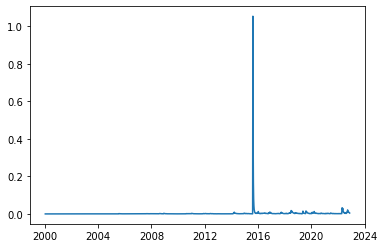

In [ ]:
plt.plot(date2, v2)

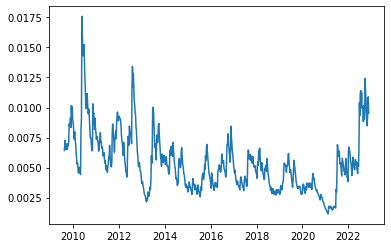

In [ ]:
plt.plot(date2[500:],v2[500:])

In [ ]:
risk = np.sqrt(.0097)
print(risk)
rr = 100*r
print(rr)
risk1 = risk*100
lower = -20 -1.96*risk1
upper = -20 + 1.96*risk1 
print(lower)
print(upper)

0.09848857801796104
[-53.90848635  93.83866169  97.90028004 ...  22.16734629   2.61494881
 -20.93876179]
-39.30376129152036
-0.6962387084796369


In [ ]:
Mdl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -28941.5
Distribution:                  Normal   AIC:                           57893.0
Method:            Maximum Likelihood   BIC:                           57926.5
                                        No. Observations:                 5969
Date:                Thu, Mar 16 2023   Df Residuals:                     5968
Time:                        03:02:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0666      0.404      2.643  8.226e-03 [  0.276,  1.858]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.2023  5.246e-02      3.855  1.155e-04   [9.944e-02,  0.305]
alpha[1]       0.2328  3.266e-02      7.126  1.033e-12     [  0.169,  0.297]
gamma[1]       0.0408  1.637e-02      2.494  1.263e-02 [8.746e-03,7.293e-02]
beta[1]        0.9729  7.513e-03    129.504      0.000     [  0.958,  0.988]
============================================================================

Covariance estimator: robust
"""

Let's see how well an SVJD (Stochastic Volatility Jump Diffusion) Process can fit this kernel:

$\textbf{Stochastic Volatility Model}$


This model has the following continuous time representation:

$ \Delta S_t = \alpha + \beta  \Delta S_{t_1} + z_{s,t}  \sigma_{s,t}$

$ z_{s,t} \sim N(0,1)$

$ \sigma^2_{s,t} = \delta + \gamma \sigma^2_{s,t-1} + z_{v,t} \sigma_v$

$ z_{v,t} \sim N(0,1)$  

$\rho(z_s,z_v)= \hat{\rho}$





Spedifically we want to feed into an SVJD model the following parameters:

$\Omega = [ \alpha,  \beta, \hat{\rho},  \delta, \gamma,  \sigma_v ]$

In [ ]:
!pip install tensorflow
import math
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import tensorflow as tf
import scipy.special
rho = 0
seed = 1
np.random.seed(seed)
y = PesoUSdiff * 100
rr = len(y)*5
vmat = [[1,rho],[rho,1]]
zz = np.random.multivariate_normal(np.zeros(2), vmat, size=rr) * 1;
rr = len(y)
data = Xe
data1 = Fe

def autocorr(x):
    x = np.array(x)
    x = x.reshape((-1,))
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]


def svmodel(betab, fixedarg1 = "data", fixed_arg2 = "data1", 
              fixed_arg3 = "y", fixed_arg4 = "zz"):
   # global fixed_params1, fixed_params2, fixed_params3, fixed_params4, fixed_params5
    seed = 0
    np.random.seed(seed)
    v = np.zeros(rr)
    betabb= scipy.special.expit(betab)
    v[0] = .0001
    alpha = betab[0]
    beta = betab[1]
    delta = betab[2]
    gamma = betab[3]
    sigmav = betab[4]
    yhat = np.zeros((rr, 1))
    vmat = [[1,rho],[rho,1]]
    for i in range(1, rr):
        yhat[i] = alpha + beta * yhat[i-1] + (math.exp(v[i - 1])**.5) * zz[i, 0]
        v[i] =   delta  + gamma*  v[i - 1] + sigmav * zz[i, 1]
      
    yhat = yhat
    kde = stats.gaussian_kde(yhat.T)
    yhats = np.linspace(np.min(yhat), np.max(yhat), 100)
    f1hat = kde(yhats)
    f1hat = f1hat / np.sum(f1hat)
    theta = [alpha, rho, delta, gamma, sigmav]
    ys = data
    f1 = data1
    error0 = np.mean(ys) - np.mean(yhats);
    error1 = ys - yhats
    error2 = f1 - f1hat
    error3 = np.var(ys) - np.var(yhats)
    error4 = scipy.stats.skew(ys) - scipy.stats.skew(yhats);
    error5 = scipy.stats.kurtosis(ys) - scipy.stats.kurtosis(yhats);
    junk1 = autocorr(y)
    rho1_y = junk1[:3]
    junk2 = autocorr(y ** 2);
    rho2_y = junk2[:3]
    junk3 = autocorr(yhat[:])
    rho1_yhat = junk3[:3]
    junk4 = autocorr(yhat[:] ** 2)
    rho2_yhat = junk4[:3]
    error6 = rho1_y - rho1_yhat
    error7 = rho2_y - rho2_yhat

    ERROR = error0 ** 2 +  np.sum(error1 **2) + np.sum(error2 **2) + error3 ** 2 + error4 ** 2 + error5 ** 2
    + np.sum(error6 ** 2) + np.sum(error7 ** 2)
    
    if ERROR is None:
        ERROR = 1000

    return ERROR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def svmodel1(betab, fixedarg1 = "data", fixed_arg2 = "data1", 
              fixed_arg3 = "y", fixed_arg4 = "zz"):
   # global fixed_params1, fixed_params2, fixed_params3, fixed_params4, fixed_params5
    seed = 0
    np.random.seed(seed)
    rr = len(y)
    v = np.zeros(rr)
    betabb= scipy.special.expit(betab)
    v[0] = .0001
    alpha = betab[0]
    beta = betab[1]
    delta = betab[2]
    gamma = betab[3]
    sigmav = betab[4]
    yhat = np.zeros((rr, 1))
    rr = len(y)
    vmat = [[1,rho],[rho,1]]
    for i in range(1, rr):
        yhat[i] = alpha + beta * yhat[i-1] + (math.exp(v[i - 1])**.5) * zz[i, 0]
        v[i] =   delta  + gamma*  v[i - 1] + sigmav * zz[i, 1]
      
    yhat = yhat
    kde = stats.gaussian_kde(yhat.T)
    yhats = np.linspace(np.min(yhat), np.max(yhat), 100)
    f1hat = kde(yhats)
    f1hat = f1hat / np.sum(f1hat)
    theta = [alpha, rho, delta, gamma, sigmav]
    ys = data
    f1 = data1
    error0 = np.mean(ys) - np.mean(yhats);
    error1 = ys - yhats
    error2 = f1 - f1hat
    error3 = np.var(ys) - np.var(yhats)
    error4 = scipy.stats.skew(ys) - scipy.stats.skew(yhats);
    error5 = scipy.stats.kurtosis(ys) - scipy.stats.kurtosis(yhats);
    junk1 = autocorr(y)
    rho1_y = junk1[:3]
    junk2 = autocorr(y ** 2);
    rho2_y = junk2[:3]
    junk3 = autocorr(yhat[:])
    rho1_yhat = junk3[:3]
    junk4 = autocorr(yhat[:] ** 2)
    rho2_yhat = junk4[:3]
    error6 = rho1_y - rho1_yhat
    error7 = rho2_y - rho2_yhat

    ERROR = error0 ** 2 +  np.sum(error1 **2) + np.sum(error2 **2) + error3 ** 2 + error4 ** 2 + error5 ** 2
    + np.sum(error6 ** 2) + np.sum(error7 ** 2)
    
    if ERROR is None:
        ERROR = 1000

    return ERROR, theta, ys, f1, yhats, f1hat 
    

In [ ]:

from scipy import stats
y = 100 * PesoUSdiff
betab =[.0,-.1, .02,.9, .12]
ERROR = svmodel(betab)

In [ ]:
print(ERROR)

568.6990925364167


In [ ]:
from scipy.optimize import minimize
bounds = [(0, .1), (-.2, .9),(0.001,.1),(0,.95),(0,.20)]
betab =[.0,-.1, .02,.9, .12]


# perform the optimization with bounds
result = minimize(svmodel,betab ,method = 'Nelder-Mead', bounds=bounds)

In [ ]:
betab = result.x
print(betab)


[ 0.         -0.19999995  0.00100168  0.00044883  0.01677346]


In [ ]:

from scipy import stats
y = 100 * PesoUSdiff

ERROR = svmodel(betab)
print(ERROR)

405.5492050338306


In [ ]:
betab = result.x
ERROR1 = svmodel(betab)
print(ERROR1)

440.00116722342347


In [ ]:
betab

array([ 0.        , -0.19999995,  0.00100168,  0.00044883,  0.01677346])

In [ ]:
result1 = minimize(svmodel, betab, method = 'L-BFGS-B')

In [ ]:
betab1 = result1.x
print(betab1)
ERROR1 = svmodel(betab1)
print(ERROR1)

[  0.14690613  -0.72170389 -60.75848638   0.76736568 -33.49649018]
4.789756045258693


In [ ]:
bounds =[[0,0.21],[-.90, .05],[-70, 100],[.6,.9],[-50,55]]
result2 = scipy.optimize.dual_annealing(svmodel,bounds,initial_temp = 500, maxfun = 500)
betab2 = result2.x

In [ ]:
print(betab2)
ERROR2 = svmodel(betab2)
print(ERROR2)

[0.00000000e+00 0.00000000e+00 1.00000000e-04 6.81746157e-01
 9.00946999e-02]
438.55541150758165


In [ ]:
betab1

array([1.09462859e-04, 0.00000000e+00, 1.00000000e-04, 6.83344401e-01,
       9.00283980e-02])

In [ ]:
ERROR2 = svmodel(betab1)
print(ERROR2)

438.58109813834363


In [ ]:
result4 = minimize(svmodel,betab1 ,method = 'L-BFGS-B',bounds=bounds)
betab4 = result4.x

In [ ]:
betab4
ERROR4 = svmodel(betab4)
print(ERROR4)

438.58109813834363


In [ ]:
#!pip install pyswarms
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx



# Set the lower and upper bounds for each variable
lb = [0, 0,  0.000005 ,.5 , .00001]
ub = [.01, .1,.05, .9,.1]
bounds = (lb, ub)

# Set the parameters for the PSO algorithm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
fixed_arg1 = data 
fixed_arg2 = data1 
fixed_arg3 = y
fixed_arg4 = zz

objective = lambda betab: svmodel(betab, fixed_arg1, 
fixed_arg2, fixed_arg3, fixed_arg4)

In [ ]:
#optimizer = ps.pso(func=objective, lb=lb, ub=ub, ieqcons=[], f_ieqcons=None, args=(), kwargs={},
   #                     swarmsize=10, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-8, minfunc=1e-8,
    #                    debug=False)
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of GlobalBestPSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1,
                                    options=options)

# Perform optimization
stats = optimizer.optimize(objective, iters=100)

2023-03-15 10:53:36,348 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   1%|          |1/100, best_cost=2.26e+4


OverflowError: ignored